# Convolutional Neural Network Architecture

![NN.png](attachment:NN.png)

In [ ]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [ ]:

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
85/85 [==============================] - 92s 1s/step - loss: 0.6920 - accuracy: 0.5846 - val_loss: 0.5337 - val_accuracy: 0.7429
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
85/85 [==============================] - 90s 1s/step - loss: 0.5202 - accuracy: 0.7517 - val_loss: 0.4205 - val_accuracy: 0.8232
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
85/85 [==============================] - 90s 1s/step - loss: 0.3928 - accuracy: 0.8352 - val_loss: 0.4248 - val_accuracy: 0.7831
Epoch 4/20
85/85 [==============================] - 91s 1s/step - loss: 0.3301 - accuracy: 0.8527 - val_loss: 0.2922 - val_accuracy: 0.8782
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
85/85 [==============================] - 90s 1s/step - loss: 0.1953 - accuracy: 0.9222 - val_loss: 0.2561 - val_accuracy: 0.8782
INFO:tensorflow:Assets written to: model-005.model\assets
Epoch 6/20
85/85 [==============================] - 90s 1s/step - lo

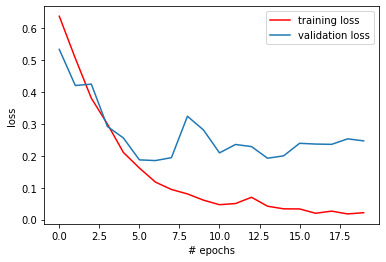

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

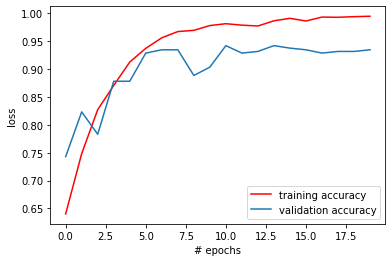

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

27/27 [==============================] - 7s 271ms/step - loss: 0.4259 - accuracy: 0.9061
[0.4258634150028229, 0.9060642123222351]
